In [86]:
import numpy as np
import pydicom
import matplotlib.pyplot as plt
from skimage.filters import gaussian

# Question 1

Open data files

In [32]:
IM1 = pydicom.read_file('data/IM_0085.dcm')
IM2 = pydicom.read_file('data/IM_0215-2.dcm')
IM3 = pydicom.read_file('data/IM_0358.dcm')
IM4 = pydicom.read_file('data/IM_0473.dcm')

Make a histogram of the counts, which can be used to determine the windows:

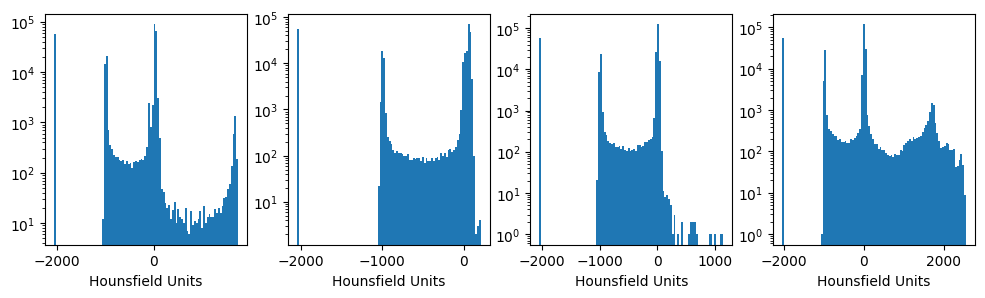

In [77]:
plt.subplots(1,4,figsize=(12,3))
plt.subplot(141)
plt.hist(IM1.pixel_array.ravel(), bins=100)
plt.semilogy()
plt.xlabel('Hounsfield Units')
plt.subplot(142)
plt.hist(IM2.pixel_array.ravel(), bins=100)
plt.semilogy()
plt.xlabel('Hounsfield Units')
plt.subplot(143)
plt.hist(IM3.pixel_array.ravel(), bins=100)
plt.semilogy()
plt.xlabel('Hounsfield Units')
plt.subplot(144)
plt.hist(IM4.pixel_array.ravel(), bins=100)
plt.semilogy()
plt.xlabel('Hounsfield Units')
plt.show()

* 0 HU's is water
* -1000 HU's is air
* 2000 HU's is metal

Get window centers and levels for plotting:

In [39]:
WL1 =58.5
WW1 = 181
WL2 = 82
WW2 = 96
WL3 = 233
WW3 = 3828
WL4 = 1463
WW4 = 1586

Plot all images

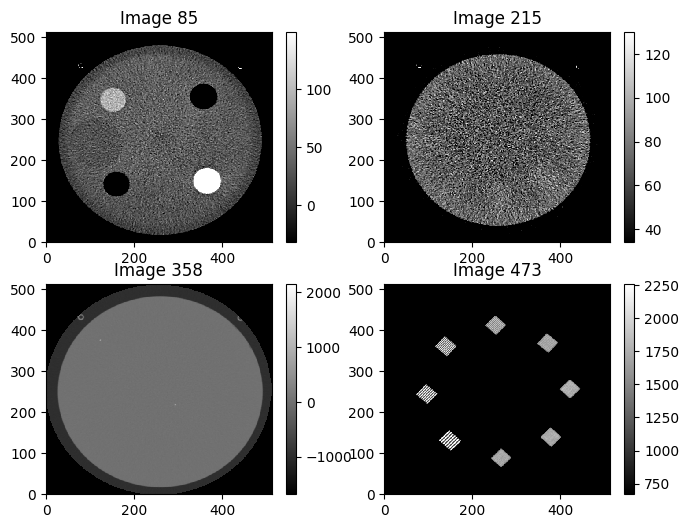

In [41]:
plt.subplots(2,2,figsize=(8,6))
plt.subplot(221)
plt.pcolor(IM1.pixel_array, vmin=WL1-WW1/2, vmax=WL1+WW1/2, cmap='gray')
plt.colorbar()
plt.title('Image 85')
plt.subplot(222)
plt.pcolor(IM2.pixel_array, vmin=WL2-WW2/2, vmax=WL2+WW2/2, cmap='gray')
plt.colorbar()
plt.title('Image 215')
plt.subplot(223)
plt.pcolor(IM3.pixel_array, vmin=WL3-WW3/2, vmax=WL3+WW3/2, cmap='gray')
plt.colorbar()
plt.title('Image 358')
plt.subplot(224)
plt.pcolor(IM4.pixel_array, vmin=WL4-WW4/2, vmax=WL4+WW4/2, cmap='gray')
plt.colorbar()
plt.title('Image 473')
plt.show()

## Part A

To get an estimate of the noise, we can use image 215

In [54]:
mask = IM2.pixel_array > WL2-WW2/2
sigma = np.std(IM2.pixel_array[mask])
mu = np.mean(IM2.pixel_array[mask])

Print values

In [78]:
print(f'Standard deviation: {sigma:.2f} HU')
print(f'Mean: {mu:.2f} HU')

Standard deviation: 14.54 HU
Mean: 69.19 HU


The noise (which is quantified by the standard deviation) is acceptable for clinical use so long as it doesn't hide prominent features to be detected. This largely depends on the specific clinical feature being studied. As seen in the other three image, the noise is not large enough to impact the visible features such as the disks ($\approx 0$HU) and the metal bars ($\approx 2000$HU).

## Part B

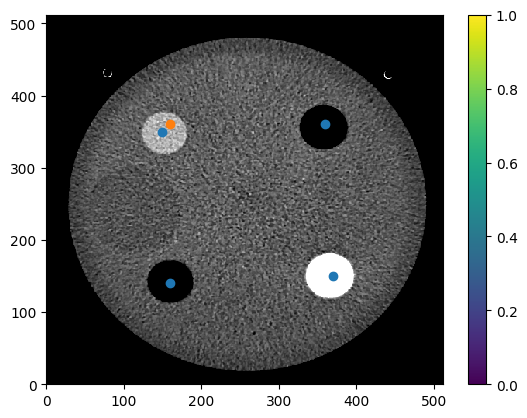

In [101]:
plt.pcolor(IM1.pixel_array, vmin=WL1-WW1/2, vmax=WL1+WW1/2, cmap='gray')
plt.scatter([150,160,360,370],[350,140,360,150])
plt.scatter([150+10],[350+10])
plt.colorbar()
plt.show()

We can get noise and mean estimates from each of these disk regions